# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
## lets import our libraries
import pandas as pd
import numpy as np

## visualition libraraies
import matplotlib.pyplot as plt
import seaborn as sns


## Data Overview


In [2]:
## load the data
data = pd.read_csv('dataset/used_device_data.csv')
data


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46


In [4]:
## brief overivew of data
## crate a cope of the data
df=data.copy()


In [5]:
## brief overview of the data
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [11]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.24,62.31


In [6]:
## lets get a quick description of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   object 
 13  new_price         3454 non-null   float64
 14  used_price        3453 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 404.9+ KB


In [14]:
## lets show a summary of the numerical attributes
df.describe().round()


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,new_price,used_price
count,3454.0,3275.0,3452.0,3450.0,3450.0,3448.0,3447.0,3454.0,3454.0,3453.0
mean,14.0,9.0,7.0,55.0,4.0,3133.0,183.0,2016.0,237.0,92.0
std,4.0,5.0,7.0,85.0,1.0,1300.0,88.0,2.0,194.0,55.0
min,5.0,0.0,0.0,0.0,0.0,500.0,69.0,2013.0,18.0,5.0
25%,13.0,5.0,2.0,16.0,4.0,2100.0,142.0,2014.0,120.0,56.0
50%,13.0,8.0,5.0,32.0,4.0,3000.0,160.0,2016.0,190.0,82.0
75%,15.0,13.0,8.0,64.0,4.0,4000.0,185.0,2018.0,291.0,116.0
max,31.0,48.0,32.0,1024.0,12.0,9720.0,855.0,2020.0,2560.0,750.0


In [7]:
## determining the length of the dataset
len(df)


3454

In [8]:
## check the data type
df.dtypes

brand_name           object
os                   object
screen_size         float64
4g                   object
5g                   object
main_camera_mp      float64
selfie_camera_mp    float64
int_memory          float64
ram                 float64
battery             float64
weight              float64
release_year          int64
days_used            object
new_price           float64
used_price          float64
dtype: object

In [10]:
## check for missing values in the data
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            1
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

### Target variable analysis of used price

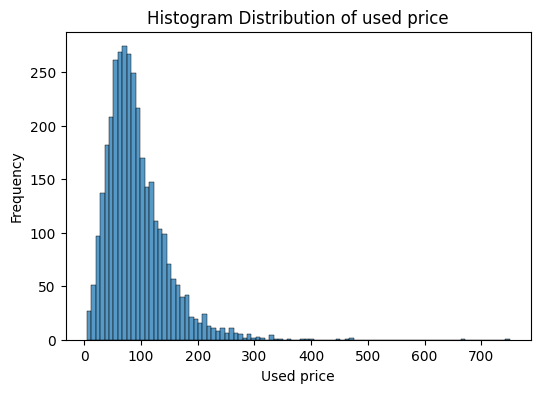

In [17]:
plt.figure(figsize=(6,4))

sns.histplot(data=df,x= "used_price",)

plt.title("Histogram Distribution of used price")
plt.xlabel("Used price")
plt.ylabel("Frequency")

plt.show()


In [18]:
##apply log transformation to the target variable
log_used_price= np.log1p(df['used_price'])

plt.figure(figsize=(8,4))

sns.histplot(log_used_price, bins=40)

plt.title("Distribution of used used price after log transformation")
plt.xlabel("Log (Used price +1)")
plt.ylabel("Frequency")

plt.show()

### Plotting the Correlation of features with respect to used price

In [19]:
numerical_col=df.select_dtypes(exclude=[object])
corr_matrix= numerical_col.corr()


In [20]:
corr_matrix['used_price'].sort_values(ascending=False)

used_price          1.000000
new_price           0.809473
selfie_camera_mp    0.614756
battery             0.549664
ram                 0.529469
screen_size         0.529220
release_year        0.494833
main_camera_mp      0.459125
int_memory          0.378349
weight              0.357844
Name: used_price, dtype: float64

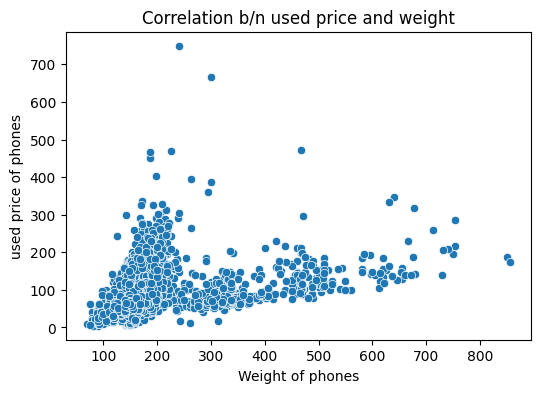

In [21]:
### correlation b/n weight and used price
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='weight', y='used_price' )

plt.title('Correlation b/n used price and weight')
plt.xlabel('Weight of phones')
plt.ylabel('used price of phones')

plt.show()

In [22]:
### correlation b/n ram and used price
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='ram', y='used_price')

plt.title('Correlation b/n ram and used price of a phone')
plt.xlabel('ram')
plt.ylabel('uesed price')

plt.show()

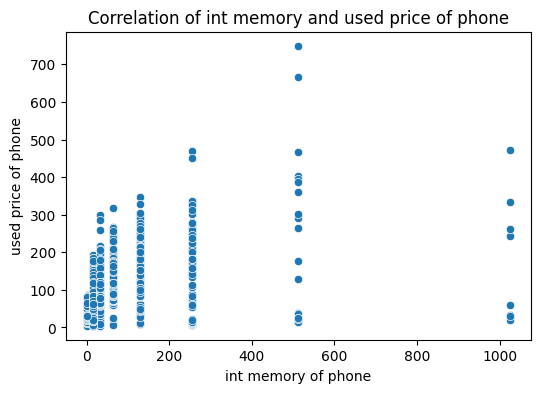

In [24]:
### Correlation b/n int memory and used price
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='int_memory', y='used_price')

plt.title('Correlation of int memory and used price of phone')
plt.xlabel('int memory of phone')
plt.ylabel('used price of phone')

plt.show()

### What percentage of the used device market is dominated by Android devices?

In [25]:
### Question 2 
## frequency table is used for this analysis since it is a non numerical data.

pd.crosstab(index= df['os'], columns= 'counts', dropna=True)

col_0,counts
os,
Android,3214
Others,137
Windows,67
iOS,36


### The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

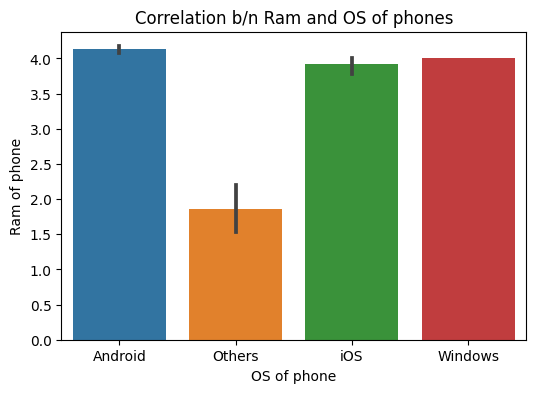

In [26]:
### Question 3
##corrrelation b/n non numerical data and numerical data 
##Barchart

plt.figure(figsize=(6,4))

sns.barplot(data=df, x='os', y='ram')

plt.title('Correlation b/n Ram and OS of phones')
plt.xlabel('OS of phone')
plt.ylabel('Ram of phone')

plt.show()

### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

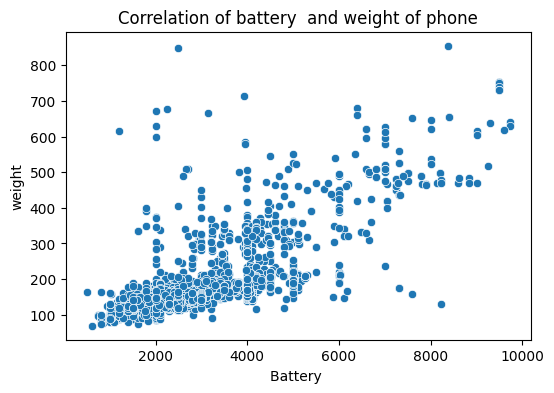

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='battery', y='weight')

plt.title('Correlation of battery  and weight of phone')
plt.xlabel('Battery ')
plt.ylabel('weight')

plt.show()

### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

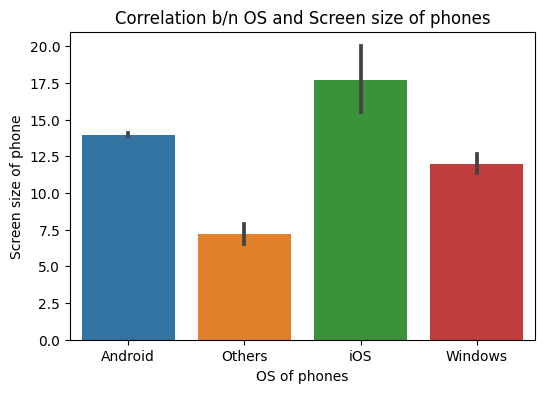

In [30]:
## numerical and non neumerical data analysis
plt.figure(figsize=(6,4))

sns.barplot(data=df, x='os', y='screen_size')

plt.title('Correlation b/n OS and Screen size of phones')
plt.xlabel('OS of phones')
plt.ylabel('Screen size of phone')

plt.show()

### Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

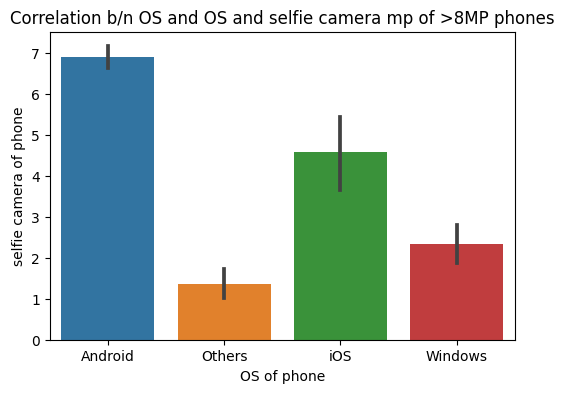

In [33]:
### numerical Vrs non numerical data
plt.figure(figsize=(6,4))

sns.barplot(data=df, x='os', y='selfie_camera_mp')

plt.title('Correlation b/n OS and OS and selfie camera mp of >8MP phones')
plt.xlabel('OS of phone')
plt.ylabel('selfie camera of phone')

plt.show()

### Which attributes are highly correlated with the price of a used device?

<Axes: >

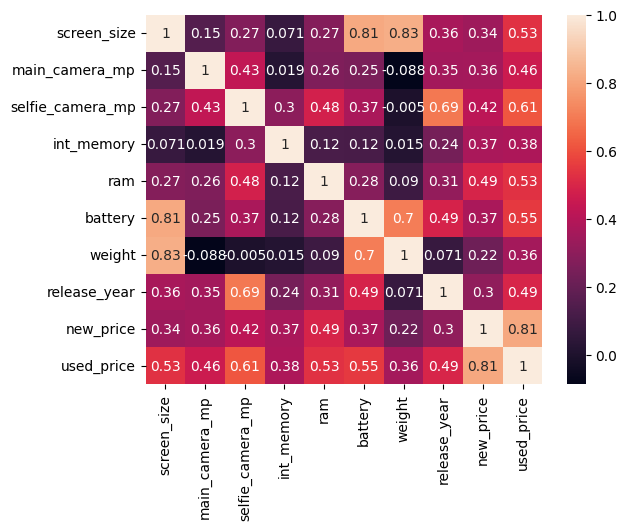

In [35]:
sns.heatmap(corr_matrix, annot=True)